In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use("seaborn")

In [28]:
housing = pd.read_csv("testing.csv")
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## Bar Chart

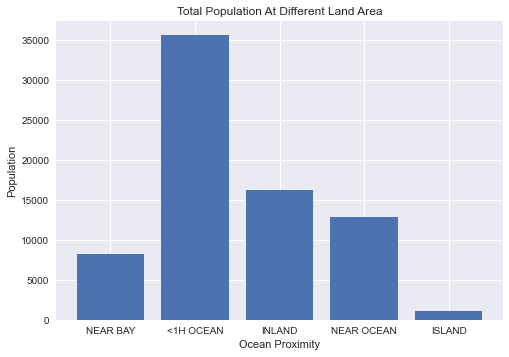

In [29]:
plt.title("Total Population At Different Land Area")

x = housing.ocean_proximity
y = housing.population

plt.xlabel("Ocean Proximity")
plt.ylabel("Population")

# plt.figure(figsize = (6, 4))

bar = plt.bar(x, y)
plt.show()

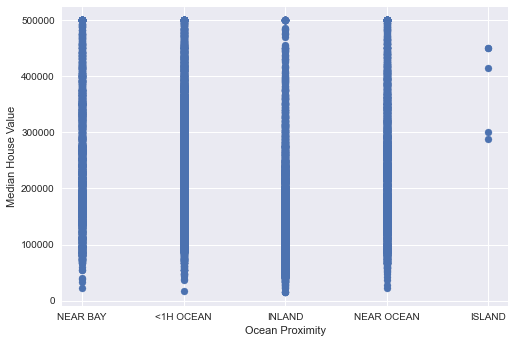

In [30]:
# average housing cost against ocean proximity

distance_to_ocean = housing.ocean_proximity
average_house_cost = housing.median_house_value

plt.xlabel("Ocean Proximity")
plt.ylabel("Median House Value")

plt.scatter(distance_to_ocean, average_house_cost)
plt.show()

In [24]:
import seaborn as sns

In [26]:
housing = sns.load_dataset('testing')

ValueError: 'testing' is not one of the example datasets.

In [22]:
sns.scatterplot(data=housing, x='median_housing', y='median_income', hue='ocean_proximity')

ValueError: Could not interpret value `median_housing` for parameter `x`